Traducción al español de http://www.astropy.org/astropy-tutorials/Coordinates.html hecha por Germán Chaparro.

# Usando `astropy.coordinates` para Combinar Catálogos and Planear Observationes

En este tutorial, exploraremos cómo el paquete `astropy.coordinates` junto con la funcionalidad general de astropy puede ser usado para planear observaciones y en general obtener información que requiera el uso de catálogos astronómicos grandes.

Este tutorial requiere astropy v1.0 o más reciente, y el paquete astroquery.

In [2]:
import urllib
import IPython.display
import numpy as np

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
import astropy as ap
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table

## Determinando lugares en el cielo con `coordinates`

Comencemos considerando un campo alrededor del pintoresco Grupo Compacto Hickson 7 (HCG7). Primero necesitamos obtener un objeto que represente las coordenadas del centro de este grupo.

En Astropy, el objeto más común para trabajar coordenadas es `SkyCoord`.  Un `SkyCoord` puede ser creado simplemente a partir de ángulos como se muestra más abajo. Es recomendable especificar el marco de referencia de sus coordenadas, aunque no es estrictamente necesario, ya que por defecto se usa el estándar ICRS de la IAU. Este estándar se puede entender como aproximadamente igual al sistema ecuatorial en el equinoxio de J2000, y se da en RA/DEC.

https://en.wikipedia.org/wiki/International_Celestial_Reference_System

In [4]:
SkyCoord?

In [5]:
hcg7_center = SkyCoord(9.81625*u.deg, 0.88806*u.deg, frame='icrs')
hcg7_center

<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88806)>

`SkyCoord` también acepta coordenadas formateadas como `strings` ya sea como  `strings` separados para RA/DEC o como un `string` simple. Si las unidades no vienen en el `string` original, usted tiene que especificarlas.

In [6]:
SkyCoord('23h39m15.9s', '0d53m17.016s', frame='icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    (354.81625, 0.88806)>

In [7]:
SkyCoord('0:39:15.9 0:53:17.016', unit=(u.hour, u.deg), frame='icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88806)>

Si el objeto que le interesa está en [SESAME](http://cdsweb.u-strasbg.fr/cgi-bin/Sesame), usted puede hallarlo directamente usando el método de clase<sup>1</sup> `SkyCoord.from_name()`. Esto requiere que usted esté conectado a internet. Dado que ya lo definimos explícitamente, no es necesario ejecutar este paso si usted no está conectado a internet.

<sub> <sup>1</sup>Un objeto de clase es un constructor alternativo para un objeto `SkyCoord` object. Si usted llama la  `SkyCoord.from_name()` con un nombre, va a generar un nuevo objeto `SkyCoord`. Para más información sobre los objetos de clase y su uso, vea [esta página](https://julien.danjou.info/blog/2013/guide-python-static-class-abstract-methods).</sub>

In [9]:
hcg7_center = SkyCoord.from_name('Hcg 7')
hcg7_center

<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88806)>

In [10]:
Black_Hole = SkyCoord.from_name('Sgr A*')
Black_Hole

<SkyCoord (ICRS): (ra, dec) in deg
    (266.41681663, -29.00782497)>

El objeto que acabamos de crear nos da varias formas útiles de tener acceso a la información que almacena. En particular se usan los atributos ``ra`` y ``dec``, que son objetos [``Quantity``](http://docs.astropy.org/en/stable/units/index.html) de Astropy especializados (de hecho, pertenecen a una sub-clase llamada [``Angle``](http://docs.astropy.org/en/stable/api/astropy.coordinates.Angle.html), cuyas subclases son [``Latitude``](http://docs.astropy.org/en/stable/api/astropy.coordinates.Latitude.html) y [``Longitude``](http://docs.astropy.org/en/stable/api/astropy.coordinates.Longitude.html)).  Estos objetos almacenan ángulos y muestran representaciones bonitas de ellos. También tiene atributos útiles para convertir fácilmente a unidades comunes de ángulo.

In [12]:
type(hcg7_center.ra), type(hcg7_center.dec)

(astropy.coordinates.angles.Longitude, astropy.coordinates.angles.Latitude)

In [13]:
hcg7_center.dec

<Latitude 0.88806 deg>

In [14]:
hcg7_center.ra

<Longitude 9.81625 deg>

In [15]:
hcg7_center.dec.hour

0.05920400000000001

Ahora que tenemos un objeto `SkyCoord`, podemos usarlo para acceder a datos del [Sloan Digital Sky Survey](http://www.sdss.org/) (SDSS).  Empecemos intentando obtener una imagen usando la herramienta de recorte de imágenes de SDSS para asegurarnos que HGC7 está incluido en el catálogo SDSS y que tiene buena calidad de imagen.

Esto requiere estar conectado a internet, pero si falla, el archivo ``'HCG7_SDSS_cutout.jpg'`` se incluye en el repositorio.

In [16]:
impix = 1024
imsize = 12*u.arcmin
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urllib.urlencode(dict(ra=hcg7_center.ra.deg, 
                                     dec=hcg7_center.dec.deg, 
                                     width=impix, height=impix, 
                                     scale=imsize.to(u.arcsec).value/impix))
url = cutoutbaseurl + '?' + query_string

urllib.urlretrieve(url, 'HCG7_SDSS_cutout.jpg')

('HCG7_SDSS_cutout.jpg', <httplib.HTTPMessage instance at 0x105523e18>)

In [18]:
urllib.urlencode(dict(ra=hcg7_center.ra.deg, 
                                     dec=hcg7_center.dec.deg, 
                                     width=impix, height=impix, 
                                     scale=imsize.to(u.arcsec).value/impix))

'width=1024&scale=0.703125&dec=0.88806&ra=9.81625&height=1024'

Ahora miremos la imagen.

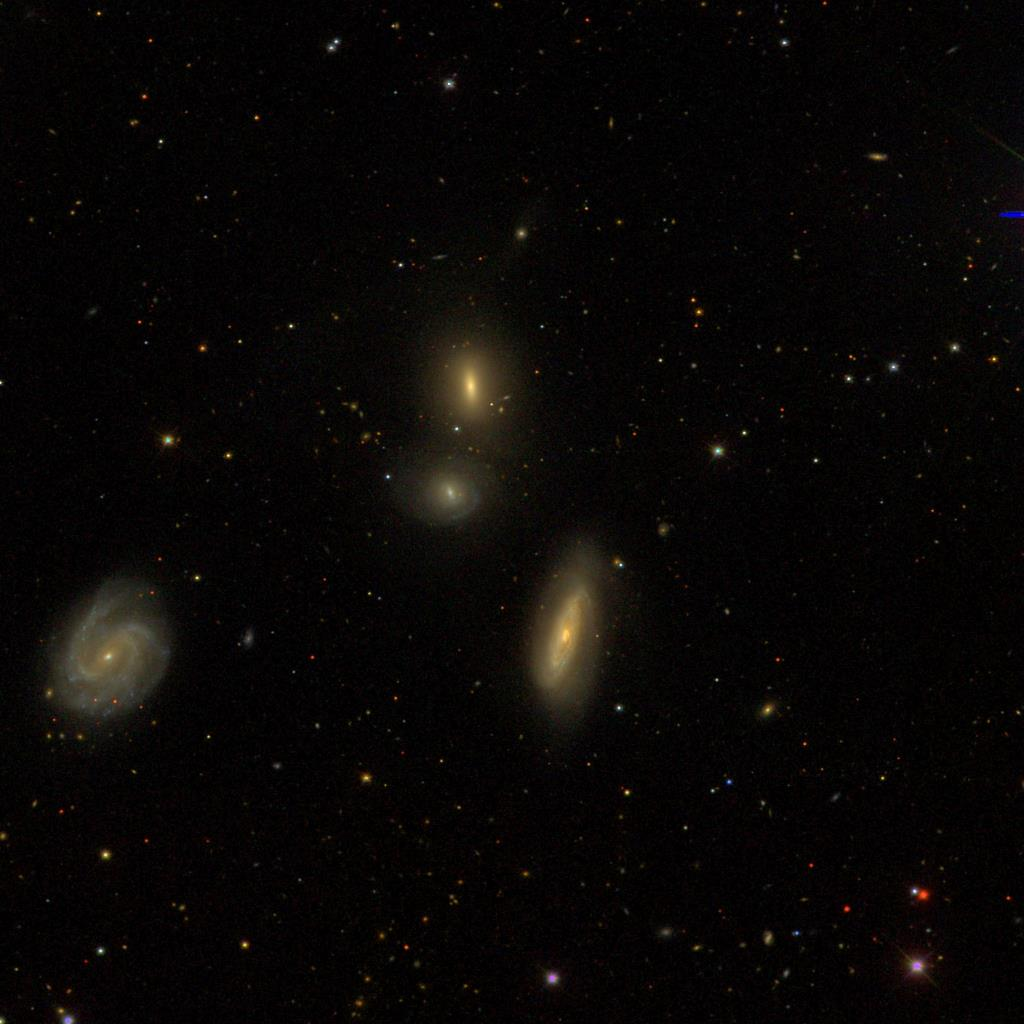

In [17]:
IPython.display.Image('HCG7_SDSS_cutout.jpg')

¡Bonito!

### Ejercicios

Cree un `SkyCoord` de algún otro objeto astronómico de su interés. Usando una sola llamada/instrucción, obtenga la RA/Dec en la forma 'HH:MM:SS.S DD:MM:SS.S'.  Revise su respuesta contra [SIMBAD](http://simbad.u-strasbg.fr/simbad/), que le mostrará las coordenadas correctas para su objeto.

(Consejo: Puede valer la pena leer la documentación de `SkyCoord.to_string()`)

Ahora obtenga una imagen de su objeto del Digitized Sky Survey y descárguela y/o muéstrela en el notebook. Puntos extra si encuentra el truco (con una sola instrucción) para mostrar la imagen en el notebook *sin* descargar el archivo.

(Consejo: STScI tiene en sus archivos una [copia del DSS](https://archive.stsci.edu/dss/).  El patrón para la URL es ``http://archive.stsci.edu/cgi-bin/dss_search?f=GIF&ra=RA&dec=DEC``)

## Usando `coordinates` y `table` para combinar y comparar catálogos

Al final de la sección anterior, encontramos que HCG7 está en SDSS, lo que significa que podemos descargar catálogos de objetos directamente desde SDSS. Más adelante, combinaremos este catálogo con otro catálogo que cubra el mismo campo, permitiéndonos hacer gráficas combinando ambos catálogos.

Vamos a entrar a la base de datos SQL de SDSS usando el paquete [astroquery](https://astroquery.readthedocs.org).  This will require an internet connection and a working install of astroquery. Si usted no tiene este paquete, puede ignorar las próximas dos celdas, porque los archivos de datos están en el repositorio. Dependiendo de su versión de `astroquery`, puede que aparezca un Warning, que podemos ignorar sin problema.

In [19]:
from astroquery.sdss import SDSS
sdss = SDSS.query_region(coordinates=hcg7_center, radius=20*u.arcmin, 
                         spectro=True, 
                         photoobj_fields=['ra','dec','u','g','r','i','z'])

/Library/Python/2.7/site-packages/astroquery/sdss/__init__.py:28: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


Los *queries* hechos a `astroquery` nos devuelve un objeto [`astropy.table.Table`](http://docs.astropy.org/en/stable/table/index.html).  Podemos trabajar con este objeto sin guardar nada en disco, pero en esta ocasión si lo haremos. De esta manera, al cerrar la sesión y volver, usted no tiene que hacer un *query* de nuevo.

(Esto no funcionará si usted no corrió la celda anterior. No hay problema, simplemente vaya a la celda que tiene ``Table.read`` y use la copia de esta tabla, incluida en el repositorio.)

In [20]:
sdss.write('HCG7_SDSS_photo.dat', format='ascii')

Si usted no tiene internet, simplemente puede leer la tabla desde Python corriendo la siguiente celda. Si usted hizo el query anterior, usted puede ignorar esta instrucción, dado que la tabla ya está almacenada en memoria como la variable llamada `sdss`.

In [84]:
sdss = Table.read('HCG7_SDSS_photo.dat', format='ascii')

Ahora tenemos un catálogo de objetos que obtuvimos de SDSS. Supongamos que usted tiene su propio catálogo de objetos en el mismo campo para compararlo con el de SDSS. En este caso usaremos un catálogo extraído de [2MASS](http://www.ipac.caltech.edu/2mass/).  Vamos a cargar este catálogo (que está en el repositorio) a Python.

In [21]:
twomass = Table.read('HCG7_2MASS.tbl', format='ascii')

Para combinar los catálogos, necesitamos objetos `SkyCoord`. Vamos a contruirlos a partir de las tablas que cargamos. Esto resulta ser directo: tomamos las columnas `ra` y `dec` de la tabla y se las damos al constructor `SkyCoord` constructor.  Primero hagamos una inspección de las tablas.

In [28]:
sdss[0:5]

ra,dec,u,g,r,i,z
float64,float64,float64,float64,float64,float64,float64
9.77091017457,0.903645650288,19.97932,18.05559,17.23341,16.95305,16.809
10.0976429177,0.856444403954,19.95236,18.67886,18.02564,17.63262,17.38337
9.89381810796,0.851181247255,23.51578,20.46127,19.02599,17.8864,17.30477
9.91764046471,0.71155275026,20.1033,19.85647,19.94004,19.70805,19.78374
9.95974339529,0.595553454876,19.47441,17.9151,16.9639,16.51964,16.16652


In [29]:
twomass[0:5]

designation,ra,dec,r_k20fe,j_m_k20fe,j_msig_k20fe,j_flg_k20fe,h_m_k20fe,h_msig_k20fe,h_flg_k20fe,k_m_k20fe,k_msig_k20fe,k_flg_k20fe,k_ba,k_phi,sup_ba,sup_phi,r_ext,j_m_ext,j_msig_ext,h_m_ext,h_msig_ext,k_m_ext,k_msig_ext,cc_flg,dist,angle
,deg,deg,arcsec,mag,mag,,mag,mag,,mag,mag,,,deg,,deg,arcsec,mag,mag,mag,mag,mag,mag,,arcsec,deg
str16,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64
00402069+0052508,10.086218,0.880798,9.4,13.835,0.068,0,13.01,0.086,0,12.588,0.089,0,0.8,70,0.82,35,18.62,13.632,0.088,12.744,0.104,12.398,0.105,0,972.120611,91.538952
00395984+0103545,9.99935,1.06514,12.9,12.925,0.035,0,12.183,0.042,0,11.89,0.067,0,0.8,35,0.7,40,35.9,12.469,0.048,11.91,0.066,11.522,0.087,0,916.927636,45.951861
00401849+0049448,10.077062,0.82913,6.0,14.918,0.086,0,14.113,0.107,0,13.714,0.103,0,0.6,-15,1.0,90,11.35,14.631,0.121,13.953,0.169,13.525,0.161,0,962.489231,102.73149
00395277+0057124,9.969907,0.953472,5.3,14.702,0.049,0,14.248,0.069,0,13.899,0.095,0,0.6,-60,0.44,-50,10.59,14.62,0.144,14.15,0.296,13.73,0.2,0,601.136444,66.93659
00401864+0047245,10.077704,0.790143,7.6,15.585,0.134,1,15.003,0.18,1,14.049,0.142,1,0.5,30,0.46,30,14.48,14.977,0.138,14.855,0.303,13.653,0.18,0,1004.982128,110.53147


Ya que tenemos las columnas de `ra` y `dec` podemos usarlas para crear nuestros `SkyCoord`s.

No es necesario crear un `SkyCoord` para cada fila en la tabla. En vez de esto, aprovechamos que `SkyCoord` recibe *arrays* de valores de coordenadas, ya sean `Quantity`s, listas de *strings*, columnas de `Table`s, etc., y `SkyCoord` hará las operaciones tranquilamente elemento a elemento.

In [30]:
coo_sdss = SkyCoord(sdss['ra']*u.deg, sdss['dec']*u.deg)
coo_twomass = SkyCoord(twomass['ra'], twomass['dec'])

In [31]:
coo_twomass

<SkyCoord (ICRS): (ra, dec) in deg
    [(10.086218, 0.880798), (9.99935, 1.06514), (10.077062, 0.82913),
     (9.969907, 0.953472), (10.077704, 0.790143), (9.895219, 0.859882),
     (9.873526, 1.063769), (10.139293, 0.818865), (9.888305, 0.597381),
     (9.959649, 0.595693), (9.928026, 0.627663), (9.912468, 0.642384),
     (10.028815, 0.683197), (9.824936, 0.699687), (9.699858, 0.582578),
     (9.766345, 0.849419), (9.805797, 0.864135), (9.824418, 0.912743),
     (9.744971, 0.957478), (9.828303, 0.891909), (9.80055, 1.044691),
     (9.666268, 1.078968), (9.704872, 0.839244)]>

Hay una diferencia sutil. Para SDSS tuvimos que dar unidades, pero no para 2MASS. Esto es porque la tabla de 2MASS tiene unidades asociadas a las columnas, mientras que SDSS no tiene unidades.

Ahora usamos el método ``SkyCoord.match_to_catalog_sky`` para combinar ambos catálogos. El orden importa: combinamos 2MASS sobre SDSS porque hay muchas más entradas en SDSS, de manera que es probable que casi todos los objetos de 2MASS están en SDSS y no al revés.

In [32]:
idx_sdss, d2d_sdss, d3d_sdss = coo_twomass.match_to_catalog_sky(coo_sdss)

``idx`` da los índices de ``coo_sdss`` que se ajustan mejor a SDSS, mientras ``d2d`` y ``d3d`` son las distancias en cielo y en espacio real entre posibles coincidencias. En nuestro caso ignoraremos ``d3d`` porque no dimos información sobre la distancia a lo largo de la línea de visión. En cambio ``d2d`` nos da un buen diagnóstico de las posibles coincidencias:

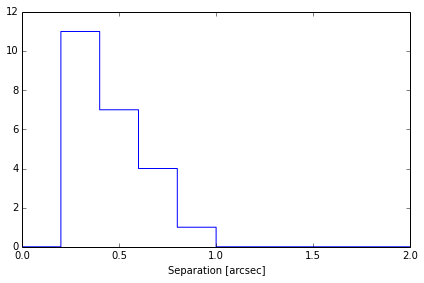

In [36]:
plt.hist(d2d_sdss.arcsec, histtype='step', range=(0,2))
plt.xlabel('Separation [arcsec]')
plt.tight_layout()

Se ve bien, pues todas las posibles coincidencias están dentro de un segundo de arco.

Ahora podemos calcular cosas como colres que combinen la fotometría de SDSS y 2MASS.

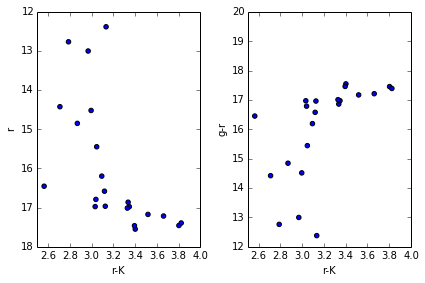

In [53]:
rmag = sdss['r'][idx_sdss]
grcolor = sdss['g'][idx_sdss] - rmag
rKcolor = rmag - twomass['k_m_ext']

plt.subplot(1, 2, 1)
plt.scatter(rKcolor, rmag)
plt.xlabel('r-K')
plt.ylabel('r')
plt.xlim(2.5, 4)
plt.ylim(18, 12) #mags go backwards!

plt.subplot(1, 2, 2)
plt.scatter(rKcolor, rmag)
plt.xlabel('r-K')
plt.ylabel('g-r')
plt.xlim(2.5, 4)

plt.tight_layout()

## Transformando entre sistemas de coordenadas y planeación de observaciones

Supongamos que usted quiere estudiar alguno de los objetos en este catálogo, y usted quiere saber cuando puede observarlo. Afortunadamente `astropy.coordinates` nos da esta información.

### Introduciendo transformaciones de coordenadas

Para enteder lo que viene a continuación, recomendamos leer el [resumen del esquema de coordenadas de astropy](http://astropy.readthedocs.org/en/latest/coordinates/index.html#overview-of-astropy-coordinates-concepts).  Lo importante es saber que todas las coordenadas en astropy están en "marcos de referencia" particulares, y podemos transformar el mismo objeto `SkyCoord` de un marco a otro.  Pdemos transformar nuestro centro de HCG7 de ICRS a coordenadas galácticas:

In [37]:
hcg7_center.galactic

<SkyCoord (Galactic): (l, b) in deg
    (116.47556813, -61.83099472)>

In [40]:
hcg7_center

<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88806)>

Lo anterior nos permite hacer una visualización rápida del cambio de coordenadas. También es posible usar el método `transform_to()` para hacer este cambio.

In [39]:
from astropy.coordinates import Galactic
hcg7_center.transform_to(Galactic())

<SkyCoord (Galactic): (l, b) in deg
    (116.47556813, -61.83099472)>

El cambio de coordenadas cambia la estructura del objeto.

In [42]:
hcg7_center.galactic.ra  # esto debe dar un mensaje de error, las coordenadas galácticas no se dan en RA/DEC

AttributeError: 'SkyCoord' object has no attribute 'ra'

In [43]:
hcg7_center.galactic.b

<Latitude -61.83099472386304 deg>

### Cambio a coordenadas AltAz

Para hacer observaciones, necesitamos hacer un cambio de coordenadas a un sistema basado en donde está el observador. Lo más común es usar coordenadas horizontales, o "AltAz". Necesitamos especificar desde donde queremos observar.

In [45]:
from astropy.coordinates import EarthLocation
from astropy.time import Time

observing_location = EarthLocation(lat='4d', lon='-72d', height=2600*u.m)  # Bogotá
# Si se usa astropy v1.1 o más reciente, se puede reemplazar por la ubicación del observatorio:
#observing_location = EarthLocation.of_site('Kitt Peak')

observing_time = Time('2015-12-21 1:00')

Ahora usamos lo anterior para crear un objeto en el marco `AltAz`. Este marco tiene información sobre la atmósfera, que puede ser usado para corregir por refracción atmosférica. Aquí no consideramos esto, porque por defecto esto se ignora (se ajusta la presión a 0).

In [51]:
from astropy.coordinates import AltAz

aa = AltAz(location=observing_location, obstime=observing_time)
aa

<AltAz Frame (obstime=2015-12-21 01:00:00.000, location=(1966985.0948135254, -6053757.644176691, 442126.472079737) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0, obswl=1.0 micron)>

Ahora transformamos nuestro `SkyCoord` en ICRS a `AltAz` para encontrar la ubicación en el cielo.

In [52]:
hcg7_center.transform_to(aa)

<SkyCoord (AltAz: obstime=2015-12-21 01:00:00.000, location=(1966985.0948135254, -6053757.644176691, 442126.472079737) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0, obswl=1.0 micron): (az, alt) in deg
    (262.84377865, 67.55147978)>